<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import sys
print(sys.version)

3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]


In [153]:
d = 2 # Number of features
k = 3 # number of clusters
n = 300 # total samples

In [154]:
mu1 = np.array([0,0])
mu2 = np.array([5,5])
mu3 = np.array([0,5])

In [155]:
x = np.zeros([n, d])
x.shape

(300, 2)

In [156]:
np.random.seed(0)

In [157]:
x[:100, :] = np.random.randn(100, d) + mu1
x[100:200, :] = np.random.randn(100, d) + mu2
x[200:, :] = np.random.randn(100, d) + mu3

In [158]:
y = np.array([0] * 100 + [1] * 100 + [2] * 100)

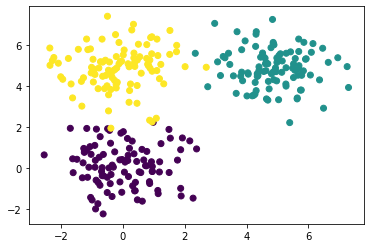

In [159]:
plt.scatter(x[:,0], x[:,1], c =  y)

In [160]:
# A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0), and the second running horizontally across columns (axis 1)
x.mean(),  x.mean(axis = 0), x.mean(axis = 1)

(2.445049470574651,
 array([1.58120215, 3.30889679]),
 array([ 1.08210478,  1.60981559,  0.44514006,  0.3993656 ,  0.15368983,
         0.79915854,  0.44135637,  0.38876878,  0.6444604 , -0.27051402,
        -0.94968561,  0.06113559,  0.40769447, -0.07071267,  1.50106899,
         0.26655497, -1.43429111, -0.09578159,  1.21633526, -0.34481478,
        -1.23428545,  0.1222526 , -0.47386324, -0.2376525 , -0.91331906,
        -0.25428203, -0.84571866,  0.20007482,  0.18449456, -0.49853163,
        -0.5160068 , -1.26971444, -0.1121774 , -0.58370805, -0.42767648,
         0.42903674, -0.04771257, -0.14123422, -0.72482341, -0.12769359,
        -0.13216168, -0.53529062,  1.69207068,  0.49942737, -0.00815045,
         0.40963406,  0.59245701,  0.53146978,  0.89818526,  0.26445073,
         0.26769582, -0.15054415,  0.38524889, -0.5805369 ,  1.70172841,
         1.38680181,  0.52441963,  0.26722651,  0.39612094,  0.76814302,
        -0.36148763,  0.81231204, -0.4221012 ,  0.70705509,  0.5398783

In [161]:
x.shape, y.shape

((300, 2), (300,))

In [162]:
x_new = np.concatenate((x, y.reshape(-1,1)), axis=1)

In [163]:
means = np.zeros([k, d])
means.shape

(3, 2)

In [164]:
means[0, :] = x[y == 0].mean(axis = 0)
means[1, :] = x[y == 1].mean(axis = 0)
means[2, :] = x[y == 2].mean(axis = 0)

In [165]:
means

array([[-9.57681805e-04,  1.42778668e-01],
       [ 4.85692167e+00,  4.88704937e+00],
       [-1.12357523e-01,  4.89686233e+00]])

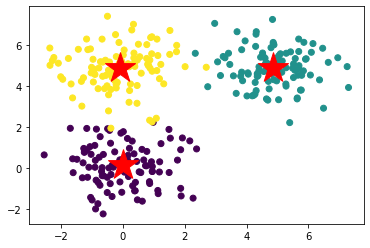

In [166]:
plt.scatter(x[:,0], x[:,1], c =  y)
plt.scatter(means[:,0], means[:,1], c =  'red', marker = '*', s = 1000)

In [167]:
options = { 0 : mu1, 1 : mu2, 2 : mu3}

In [168]:
options[random.randint(0,2)]

array([0, 5])

In [169]:
# Now we want to find out for a point which cluster it belongs to.
x_new = np.zeros([n, d])
y_new = np.zeros([n, 1])
x_new[:100, :] = np.random.randn(100, d) + mu1
x_new[100:200, :] = np.random.randn(100, d) + mu2
x_new[200:, :] = np.random.randn(100, d) + mu3
#np.random.shuffle(x_new)

dist_list = []
for row_idx in range(n):
    closest_k, min_dist = -1, float('inf')
    for k_val in range(k):
        new_dist = math.dist(x_new[row_idx], means[k_val])
        if  new_dist < min_dist:
            min_dist = new_dist
            closest_k = k_val
    dist_list.append(closest_k)    
y_new = dist_list
y_new

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


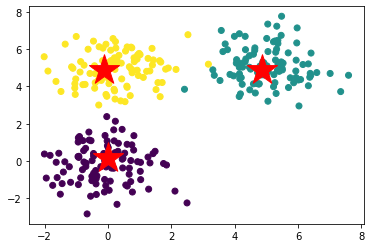

In [170]:
plt.scatter(x_new[:,0], x_new[:,1], c =  y)
plt.scatter(means[:,0], means[:,1], c =  'red', marker = '*', s = 1000)

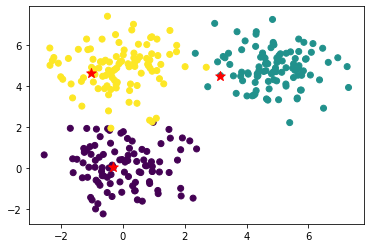

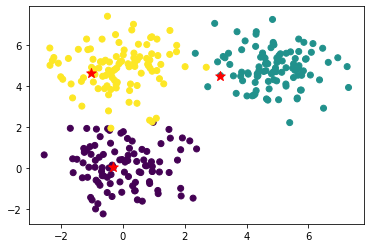

<ipython-input-181-2f494cc4055b>:41: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(saved_cluster_identities == cluster_identities):


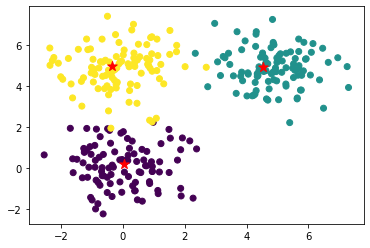

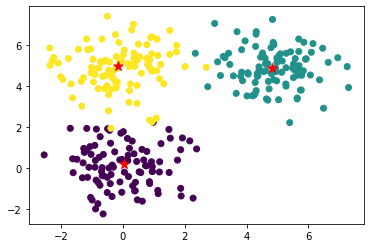

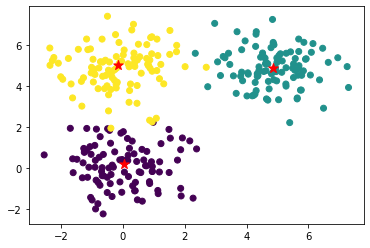

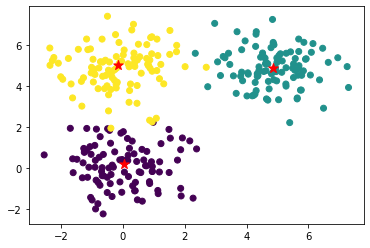

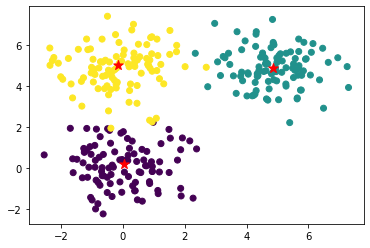

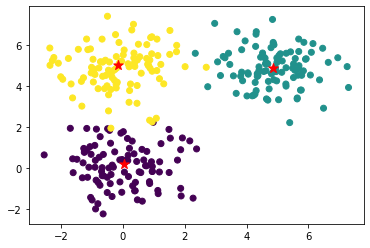

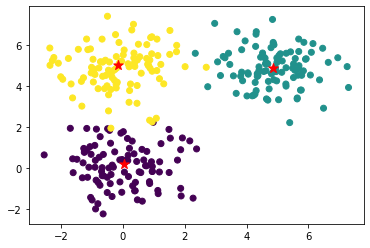

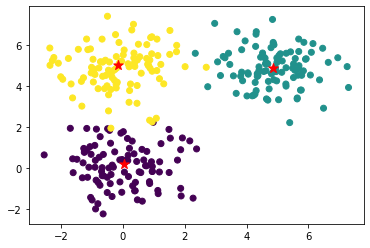

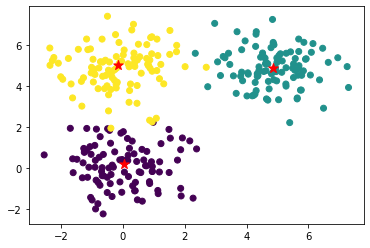

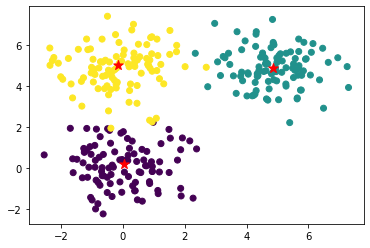

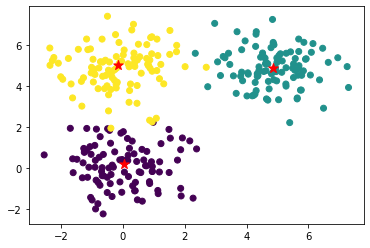

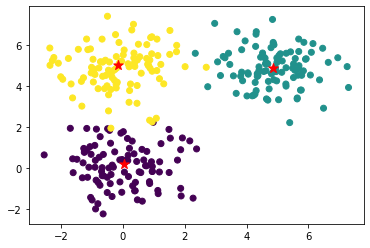

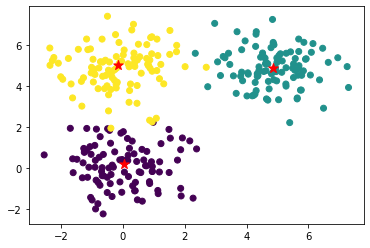

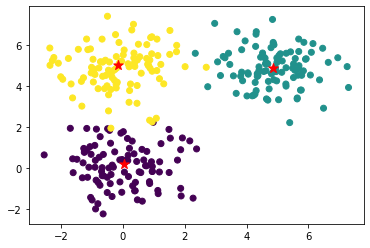

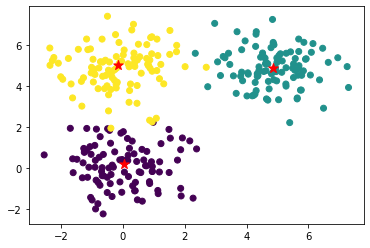

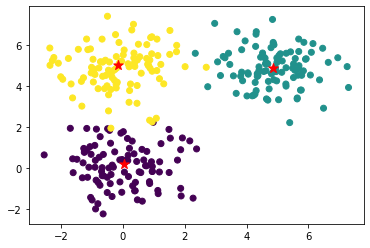

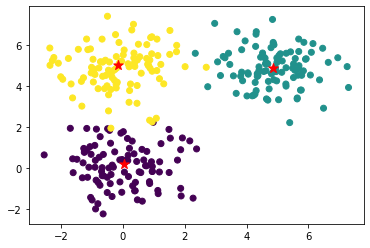

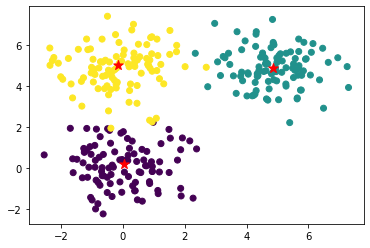

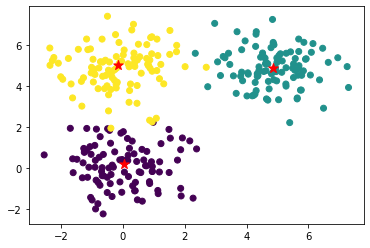

array([[ 0.02303541,  0.22381964],
       [-0.14669374,  5.01424063],
       [ 4.86047563,  4.88024692]])

In [181]:
# Implement k means clustering

# Random initialization
cluster_centers = np.zeros((k, d))
for k_val in range(k):
    rand_idx = np.random.choice(n)
    cluster_centers[k_val] = x[rand_idx]
plt.scatter(x[:,0], x[:,1], c =  y)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c =  'red', marker = '*', s = 100)
plt.show(block = False)

max_iterations = 20
cluster_identities = np.zeros(n)
saved_cluster_identities = []
costs = []
dists = np.zeros(n)

for ctr in range(max_iterations):
    #print(f"ctr : {ctr}")
    plt.scatter(x[:,0], x[:,1], c =  y)
    plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c =  'red', marker = '*', s = 100)
    plt.show(block = False)
    prev_cluster_identities = cluster_identities.copy()   
    dist_list = []
    for row_idx in range(n):
        closest_k, min_dist = -1, float('inf')
        for k_val in range(k):
            new_dist = math.dist(x[row_idx], cluster_centers[k_val])
            if  new_dist < min_dist:
                min_dist = new_dist
                closest_k = k_val
        cluster_identities[row_idx] = closest_k
        dists[row_idx] = min_dist
    costs.append(dists.sum())

    x_new = np.concatenate((x, cluster_identities.reshape(-1,1)), axis=1)
    for k_val in range(k):
        #print(f"k_val : {k_val}")
        cluster_centers[k_val, :] = x_new[cluster_identities == k_val][:, :2].mean(axis = 0)
    
    if np.all(saved_cluster_identities == cluster_identities):
        print("Convergence reached")
        break
cluster_centers

Text(0, 0.5, 'Costs')

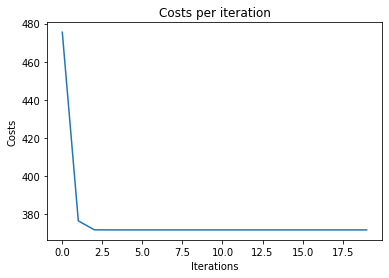

In [182]:
plt.plot(costs)
plt.title("Costs per iteration")
plt.xlabel("Iterations")
plt.ylabel("Costs")